In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Q.1 

## Function Definition

In [6]:
def dropball(h0,t):
    g=9.81
    return  -g*t

#### Using Euler method

In [61]:
def EULER(h0,p,i):
    X=[]
    T=[]
    for j in range(i):
        T.append(j*p)
        if(j==0):
            X.append(h0)
        else:
             X.append(X[j-1] + p*dropball(h0,p*(j-1)))
    return X,T

#### Plot

Text(0, 0.5, 'Height')

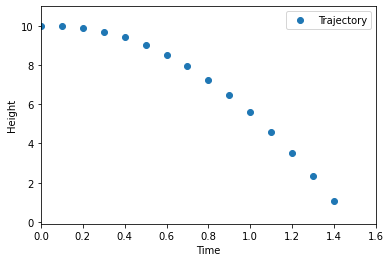

In [62]:
X,T=EULER(10,0.1,100)
plt.plot(T,X,'o')
plt.ylim(-0.1,11)
plt.xlim(0,1.6)
plt.legend(['Trajectory'])
plt.xlabel('Time')
plt.ylabel('Height')

#### Using RX4 Method 

In [9]:
def RK4(h,t,p):
    k1=p*(dropball(h,t))
    k2=p*(dropball(h+k1/2,t+p/2))
    k3=p*(dropball(h+k2/2,t+p/2))
    k4=p*(dropball(h+k3,t+p))
    k=(k1+ 2*k2 + 2*k3 + k4)/6
    return  h + k

In [51]:
def RK42(h0,i,p):
    X=[]
    T=[]
    for j in range(i):
        T.append(j*p)
        if(j==0):
            X.append(h0)
        else:
            X.append(RK4(X[j-1],j*p,p))
    return X,T

#### Plot

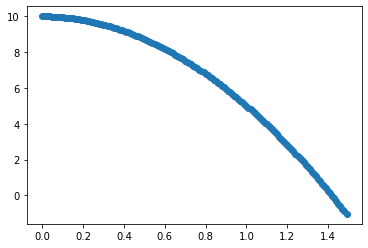

In [52]:
X,T=RK42(10,150,0.01)
plt.plot(T,X,'o')

## Q.2

#### Function Definition

In [12]:
def Projectile(t,Ang,U):
    g=9.81
    return np.array([U*(np.cos(Ang*(np.pi)/180)),U*(np.sin(Ang*(np.pi)/180) - g*(t))])

#### Using Euler's Method to solve for x and y

In [59]:
def EULER2(U,Ang,p,i):
    X=[]
    Y=[]
    for j in range(i):
        V=Projectile(p*(j-1),Ang,U)
        if(j==0):
            X.append(0)
            Y.append(0)
        else:
            X.append(X[j-1] + p*(V[0]))
            Y.append(Y[j-1] + p*(V[1]))
    return X,Y

#### Plotting 

Text(0, 0.5, 'Y-axis')

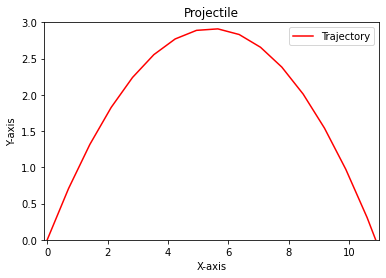

In [60]:
P=EULER2(100,45,0.01,100)
plt.plot(P[0],P[1],'r')
plt.ylim(0,3)
plt.xlim(-0.1,11)
plt.legend(['Trajectory'])
plt.title('Projectile')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

#### Using RK4 method to solve for x and y

In [64]:
def RK4Q2X(U,t,p,X):
    k1=p*(Projectile(t,45,U)[0])
    k2=p*(Projectile(t+p/2,45,U)[0])
    k3=p*(Projectile(t+p/2,45,U)[0])
    k4=p*(Projectile(t+p,45,U)[0])
    kx=(k1+ 2*k2 + 2*k3 + k4)/6
    return X+kx

In [65]:
def RK4Q2Y(U,t,p,Y):
    k1=p*(Projectile(t,45,U)[1])
    k2=p*(Projectile(t+p/2,45,U)[1])
    k3=p*(Projectile(t+p/2,45,U)[1])
    k4=p*(Projectile(t+p,45,U)[1])
    ky=(k1+ 2*k2 + 2*k3 + k4)/6
    return Y+ky

In [66]:
def RK422(U,i,p):
    X=[]
    Y=[]
    for j in range(i):
        if(j==0):
            X.append(0)
            Y.append(0)
        else:
            X.append(RK4Q2X(U,j*p,p,X[j-1]))
            Y.append(RK4Q2Y(U,j*p,p,Y[j-1]))
    return X,Y

#### Plot

(-0.01, 1.0)

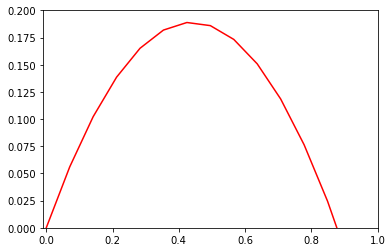

In [67]:
X,Y=RK422(10,50,0.01)
plt.plot(X,Y,'r')
plt.ylim(0,0.2)
plt.xlim(-0.01,1)

## Q.3

#### Function Definition

In [68]:
def UCM(U,t,R):
    return np.array([U*(np.cos((U*t)/R)),U*(np.sin((U*t)/R) )])

#### Using Euler's Method

In [73]:
def EULER3(U,R,i,p):
    X=[]
    Y=[]
    for j in range(i):
        V=UCM(U,p*(j-1),R)
        if(j==0):
            X.append(0)
            Y.append(0)
        else:
            X.append(X[j-1] + p*(V[0]))
            Y.append(Y[j-1] + p*(V[1]))
    return X,Y

#### Plot

(-153.9222459754198, 453.92224645365144, -71.8925177169924, 535.9519739081946)

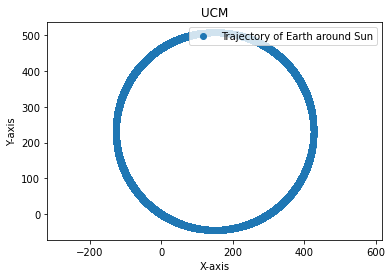

In [94]:
P=EULER3(30000,15.002,31536,0.01)
plt.plot(P[0],P[1],'o')
plt.legend(['Trajectory of Earth around Sun'],loc='upper right')
plt.title('UCM')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')

#### Using RK4 method

In [78]:
def RK43X(U,t,p,X,R):
    k1=p*(UCM(U,t+(p/2),R)[0])
    k2=p*(UCM(U,t+(p/2),R)[0])
    k3=p*(UCM(U,t +(p/2),R)[0])
    k4=p*(UCM(U,t + p,R)[0])
    k=(k1+ 2*k2 + 2*k3 + k4)/6
    return X + k

In [79]:
def RK43Y(U,t,p,Y,R):
    k1=p*(UCM(U,t+(p/2),R)[1])
    k2=p*(UCM(U,t+(p/2),R)[1])
    k3=p*(UCM(U,t +(p/2),R)[1])
    k4=p*(UCM(U,t + p,R)[1])
    k=(k1+ 2*k2 + 2*k3 + k4)/6
    return Y + k

In [83]:
def RK423(U,i,p,R):
    X=[]
    Y=[]
    for j in range(i):
        if(j==0):
            X.append(0)
            Y.append(0)
        else:
            X.append(RK43X(U,j*p,p,X[j-1],R))
            Y.append(RK43Y(U,j*p,p,Y[j-1],R))
    return X,Y

#### Plot

Text(0, 0.5, 'Y-axis')

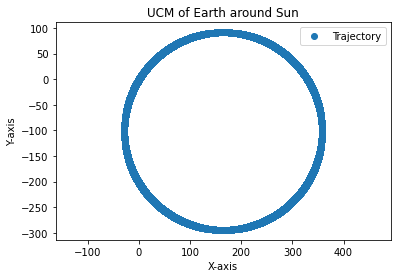

In [96]:
x,y=RK423(30000,31536,0.01,15.002)
plt.plot(x,y,'o')
plt.axis('equal')
plt.title('UCM of Earth around Sun')
plt.legend(['Trajectory'])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')